# Using convnets with small datasets

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

## Downloading the data

In [4]:
import os, shutil

In [5]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/Users/GAO/Downloads/kaggle_original_data'

In [10]:
# The directory where we will
# store our smaller dataset
base_dir = '/Users/GAO/Downloads/cats_and_dogs_small'
os.mkdir(base_dir)

In [11]:
# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [15]:
# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [17]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## Building our network

In [29]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [31]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Data preprocessing

In [32]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [34]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50, verbose=2)

Epoch 1/30
 - 10s - loss: 0.6955 - acc: 0.5305 - val_loss: 0.6761 - val_acc: 0.5710
Epoch 2/30
 - 9s - loss: 0.6591 - acc: 0.5985 - val_loss: 0.6438 - val_acc: 0.6420
Epoch 3/30
 - 9s - loss: 0.6098 - acc: 0.6705 - val_loss: 0.6081 - val_acc: 0.6730
Epoch 4/30
 - 9s - loss: 0.5653 - acc: 0.7150 - val_loss: 0.5823 - val_acc: 0.6940
Epoch 5/30
 - 9s - loss: 0.5307 - acc: 0.7345 - val_loss: 0.5804 - val_acc: 0.6970
Epoch 6/30
 - 9s - loss: 0.4987 - acc: 0.7515 - val_loss: 0.5648 - val_acc: 0.6910
Epoch 7/30
 - 9s - loss: 0.4727 - acc: 0.7745 - val_loss: 0.6044 - val_acc: 0.6950
Epoch 8/30
 - 9s - loss: 0.4408 - acc: 0.7880 - val_loss: 0.5865 - val_acc: 0.7010
Epoch 9/30
 - 9s - loss: 0.4180 - acc: 0.8080 - val_loss: 0.5352 - val_acc: 0.7350
Epoch 10/30
 - 9s - loss: 0.3888 - acc: 0.8250 - val_loss: 0.6192 - val_acc: 0.6990
Epoch 11/30
 - 9s - loss: 0.3579 - acc: 0.8465 - val_loss: 0.5840 - val_acc: 0.7260
Epoch 12/30
 - 9s - loss: 0.3317 - acc: 0.8570 - val_loss: 0.5919 - val_acc: 0.7110


In [36]:
model.save('data/cats_and_dogs_small_1.h5')

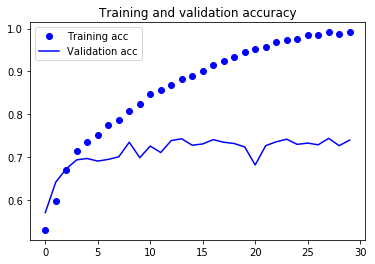

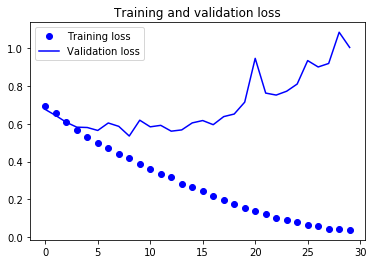

In [38]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Using data augmentation

In [41]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

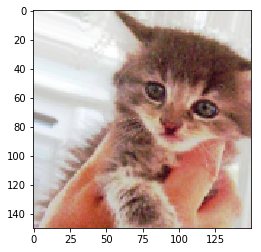

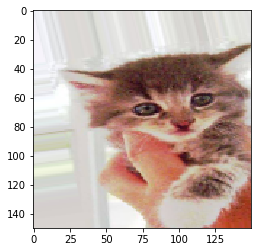

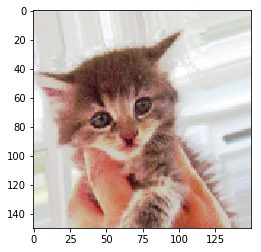

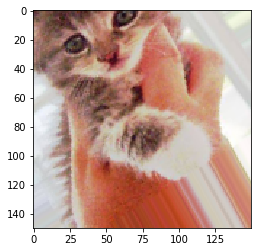

In [42]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [46]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [47]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50, verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
 - 28s - loss: 0.6941 - acc: 0.5159 - val_loss: 0.6927 - val_acc: 0.4975
Epoch 2/100
 - 23s - loss: 0.6807 - acc: 0.5603 - val_loss: 0.6705 - val_acc: 0.5567
Epoch 3/100
 - 24s - loss: 0.6725 - acc: 0.5875 - val_loss: 0.6415 - val_acc: 0.6345
Epoch 4/100
 - 25s - loss: 0.6535 - acc: 0.5984 - val_loss: 0.6890 - val_acc: 0.5425
Epoch 5/100
 - 25s - loss: 0.6349 - acc: 0.6328 - val_loss: 0.6845 - val_acc: 0.5755
Epoch 6/100
 - 24s - loss: 0.6223 - acc: 0.6394 - val_loss: 0.6052 - val_acc: 0.6656
Epoch 7/100
 - 22s - loss: 0.6070 - acc: 0.6731 - val_loss: 0.5797 - val_acc: 0.6916
Epoch 8/100
 - 23s - loss: 0.5961 - acc: 0.6781 - val_loss: 0.5964 - val_acc: 0.6733
Epoch 9/100
 - 23s - loss: 0.5837 - acc: 0.6841 - val_loss: 0.6153 - val_acc: 0.6514
Epoch 10/100
 - 22s - loss: 0.5825 - acc: 0.6897 - val_loss: 0.5532 - val_acc: 0.7069
Epoch 11/100
 - 24s - loss: 0.5753 - acc: 0.7000 - val_loss: 0.57

Epoch 96/100
 - 24s - loss: 0.3336 - acc: 0.8516 - val_loss: 0.4039 - val_acc: 0.8402
Epoch 97/100
 - 23s - loss: 0.3481 - acc: 0.8425 - val_loss: 0.3966 - val_acc: 0.8338
Epoch 98/100
 - 26s - loss: 0.3327 - acc: 0.8603 - val_loss: 0.3896 - val_acc: 0.8428
Epoch 99/100
 - 24s - loss: 0.3223 - acc: 0.8591 - val_loss: 0.5103 - val_acc: 0.8071
Epoch 100/100
 - 24s - loss: 0.3203 - acc: 0.8609 - val_loss: 0.3917 - val_acc: 0.8389


In [48]:
model.save('data/cats_and_dogs_small_2.h5')

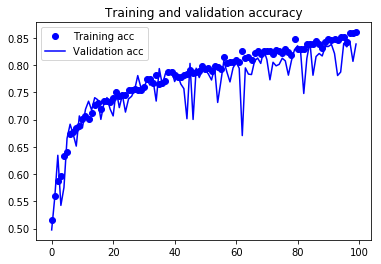

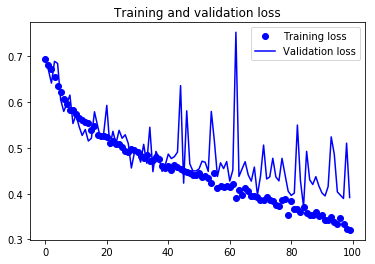

In [49]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()